In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("cars_data.csv")

In [57]:
data.isnull().sum()

model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

In [58]:
data["price"].isnull().sum()

np.int64(985)

In [59]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,125,54.3,1.2,ford


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         96727 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      93586 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           94256 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB


In [61]:
data = data.drop('tax', axis=1)



In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         96727 non-null  float64
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      93586 non-null  object 
 6   mpg           94256 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 6.7+ MB


In [63]:
data.isnull().sum()


model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

In [64]:
data['fuelType'].mode()

0    Petrol
Name: fuelType, dtype: object

In [65]:
data['fuelType']

0        Petrol
1        Petrol
2        Diesel
3        Diesel
4        Petrol
          ...  
97707    Petrol
97708    Diesel
97709    Petrol
97710    Petrol
97711    Diesel
Name: fuelType, Length: 97712, dtype: object

In [66]:
data['fuelType'].fillna(data['fuelType'].mode()[0],inplace=True)

In [67]:
data['fuelType'].isnull().sum()

np.int64(0)

In [68]:
data['fuelType'].isna().sum()


np.int64(0)

In [69]:
data['mpg'].fillna(data['mpg'].mean())

0        60.1
1        58.9
2        49.6
3        62.8
4        54.3
         ... 
97707    54.3
97708    61.4
97709    54.3
97710    50.4
97711    48.7
Name: mpg, Length: 97712, dtype: float64

In [70]:
data['mpg'].isnull().sum()

np.int64(3456)

In [71]:
data.isnull().sum()

model              0
year               0
price            985
transmission       0
mileage            0
fuelType           0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

In [72]:
data['price'].mean()

np.float64(16774.299823213787)

In [73]:
data['price'].fillna(data['price'].mean())

0         7495.0
1        10989.0
2        27990.0
3        12495.0
4         7999.0
          ...   
97707    10447.0
97708    14995.0
97709     8950.0
97710    10700.0
97711    15798.0
Name: price, Length: 97712, dtype: float64

In [74]:
data['price'].isnull().sum()

np.int64(985)

In [75]:
data.isnull().sum()

model              0
year               0
price            985
transmission       0
mileage            0
fuelType           0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

In [76]:
data.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,54.3,1.2,ford


In [77]:
data = data.dropna()

In [78]:
data.head()


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,54.3,1.2,ford


In [79]:
data[['model', 'year', 'mileage', 'mpg', 'price']].dropna()

,model,year,mileage,mpg,price
0,I10,2017,11630,60.1,7495.0
1,Polo,2017,9200,58.9,10989.0
2,2 Series,2019,1614,49.6,27990.0
3,Yeti Outdoor,2017,30960,62.8,12495.0
4,Fiesta,2017,19353,54.3,7999.0
...,...,...,...,...,...
97707,Fiesta,2017,8337,54.3,10447.0
97708,3 Series,2014,25372,61.4,14995.0
97709,Fiesta,2017,19910,54.3,8950.0
97710,Astra,2017,24468,50.4,10700.0


In [80]:
# Combine all columns (features + target), drop any rows with missing data
combined = data[['model', 'year', 'mileage', 'mpg', 'price']].dropna()

# Define X and y
X = combined[['model', 'year', 'mileage', 'mpg']]
y = combined['price']

# Apply one-hot encoding on the categorical 'model' column
X_encoded = pd.get_dummies(X, columns=['model'], drop_first=True)

# Split using encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Train the model on encoded features
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Model Performance:
Mean Squared Error: 19259838.07
R-squared: 0.80


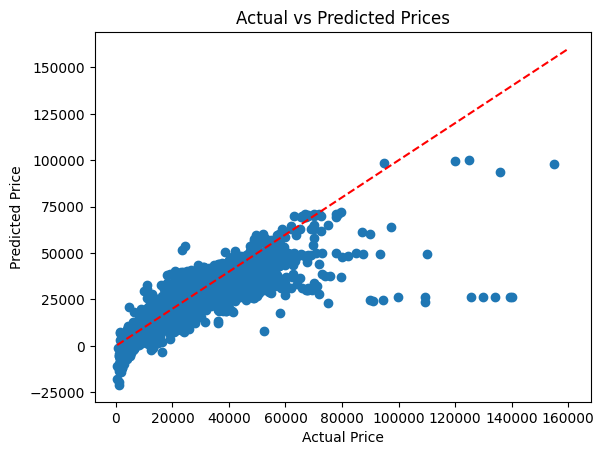

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.show()


In [82]:
data['model']

0                  I10
1                 Polo
2             2 Series
3         Yeti Outdoor
4               Fiesta
             ...      
97707           Fiesta
97708         3 Series
97709           Fiesta
97710            Astra
97711      Grandland X
Name: model, Length: 94256, dtype: object

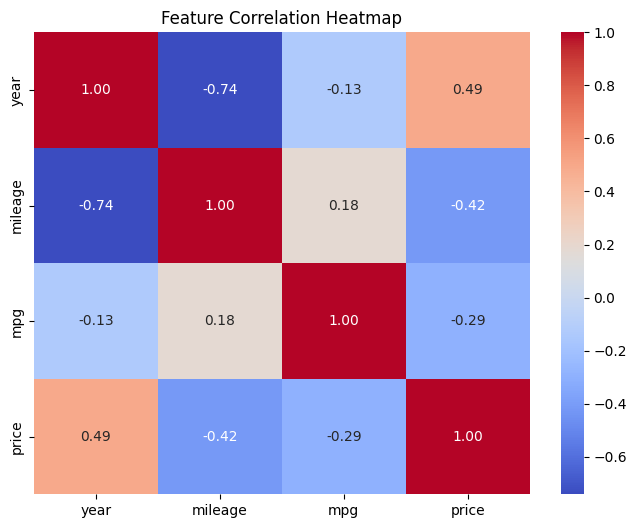

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = combined[['year', 'mileage', 'mpg', 'price']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
